In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Fetch of MNIST dataset
Here is the code to fetch MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Display and examination of the MNIST dataset


In [4]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

X.shape shows there are 70,000 images with each image having 784 features. Each image is 28x28 pixels (that's why 784 features). The value of each feature is just a pixel's intensity ranging from 0(white) to 1(black).
<br>y.shape shows there are 70,000 labels.
<br>Now,let's plot the value of a image of your choosing using Matplotlib's imshow() function.

In [6]:
random_number = int(input("Enter a number between 0 and 69999: "))

Enter a number between 0 and 69999: 63


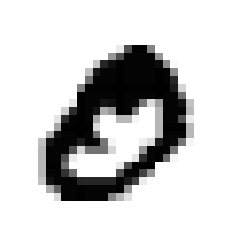

In [7]:
random_number_image = X[random_number].reshape(28,28)
plt.imshow(random_number_image, cmap=matplotlib.cm.get_cmap('binary'))
plt.axis(False)
plt.show()

In [8]:
y[random_number]

'0'

This shows that label is giving us the same value as in the image.

## Train a Stochastic Gradient Descent (SGD) binary classifier

First, let's cast y to integers as it is a string as shown above.

In [9]:
y=y.astype(np.uint8)
y[random_number]

0

Before testing binary classifier, we have to make sure that there is a test set and train set. The MNIST dataset already did it. The first 60,000 images are for training set whereas last 10,000 are for test set.

In [10]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Now, I choose a digit "8" for binary classifier which distinguishes two classes, 8 or not 8 and create the target vectors.

In [11]:
y_train_8 = (y_train == 8) # True if a digit is 8 and false for others.
y_test_8 = (y_test == 8)

Finally, let's train our data using SGD classifier. For this, we will use ***SGDClassifier*** class from Scikit-Learn.

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_8)

SGDClassifier(random_state=42)

Let's check it on our previous chosen image.

In [13]:
sgd_clf.predict([X[random_number]])

array([False])

which is the expected result

## Determine the precision of SGD classifier using a Confusion matrix

Confusion matrix is a great way to evaluate the precision of a classifier. For this, we need to have a set of predictions.

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)
y_train_predict

array([False, False, False, ..., False, False,  True])

Let's pass these predicted classes and targer class to the ***confusion_matrix()*** function.

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_predict)

array([[50006,  4143],
       [ 1448,  4403]], dtype=int64)

Here, each row is an actual class and each column represents predicted class. The first class is called negative class and the second is a positive class. 50006 images were correctly predicted as non -8s (true negatives) whereas 4143 were wrogly classified (false positives). Similarly, 1448 were wrongly classified as n0n -8s (false negatives), while 4403 were correctly classified as 8s (true positives).

Now, let's see the precision of our classifier.

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8,y_train_predict)

0.515211794991809

In [17]:
recall_score(y_train_8,y_train_predict)

0.7525209365920356

It is correct only **51.5%** of the time when it predicts the image is 8. Likewise, it only detects **75.2%** of all 8s.